# Clustering Unsupervised Assignment

Author : @mohameddhameem

Date : 2022-02-20

## Problem Statement

The purpose of this assignment to cluster bank customers into groups and validate if they are potential customer for Term Deposit.

* Clustering is the target analysis for unsupervised learning.
* Validate the Clusters with Binary Classification.

## Data Set

The data is download from UCI Machine Learning Repository

* The data is related with direct marketing campaigns of a Portuguese banking institution. 
* The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. 

### Data Set description

The dataset contains 4521 records from May 2008 to November 2010 with the following features:



| Variable Name | Description |
| --- | --- |
| age | (numeric) |
| job | type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")  |
| marital | marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed) |
| education | (categorical: "unknown","secondary","primary","tertiary") |
| default | has credit in default? (binary: "yes","no") |
| balance | average yearly balance, in euros (numeric)  |
| housing | has housing loan? (binary: "yes","no") |
| loan | has personal loan? (binary: "yes","no") |
| contact | contact communication type (categorical: "unknown","telephone","cellular")  |
| day | last contact day of the month (numeric) |
| month | last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") |
| duration | last contact duration, in seconds (numeric) |
| campaign | number of contacts performed during this campaign and for this client (numeric, includes last contact) |
| pdays | number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted) |
| previous | number of contacts performed before this campaign and for this client (numeric) |
| poutcome | outcome of the previous marketing campaign (categorical: "unknown","other","failure","success") |
| y | has the client subscribed a term deposit? (binary: "yes","no") - TARGET |


## Data Exploration

In [1]:
# lets import all the libraries we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns

# for feature engineering
from scipy.special import boxcox1p
from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder,\
 MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix,\
    precision_recall_curve, average_precision_score, precision_score, recall_score,\
    f1_score, classification_report, accuracy_score

from sklearn.tree import DecisionTreeClassifier

plt.rcParams['figure.figsize'] = [6,6]
sns.set_style("whitegrid")
sns.set_context("talk")

In [2]:
# lets read the dataset
data = pd.read_csv('BankData.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
# describe the data including object and numeric data
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,4521.0,NaN,NaN,NaN,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
job,4521,12,management,969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,4521,3,married,2797,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,4521,4,secondary,2306,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,4521,2,no,4445,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance,4521.0,NaN,NaN,NaN,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
housing,4521,2,yes,2559,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,4521,2,no,3830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,4521,3,cellular,2896,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,4521.0,NaN,NaN,NaN,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0


In [5]:
# Check if there are any null columns
print("Do we have any missing values ? ", data.isnull().sum().any())

Do we have any missing values ?  False


In [6]:
# Lets assign datatypes to the columns
data['age'] = data['age'].astype('int64')
data['job'] = data['job'].astype('category')
data['marital'] = data['marital'].astype('category')
data['education'] = data['education'].astype('category')
data['default'] = data['default'].astype('category')
data['balance'] = data['balance'].astype('float64')
data['housing'] = data['housing'].astype('category')
data['loan'] = data['loan'].astype('category')
data['contact'] = data['contact'].astype('category')
data['day'] = data['day'].astype('category')
data['month'] = data['month'].astype('category')
data['duration'] = data['duration'].astype('float64')
data['campaign'] = data['campaign'].astype('float64')
data['pdays'] = data['pdays'].astype('float64')
data['previous'] = data['previous'].astype('float64')
data['poutcome'] = data['poutcome'].astype('category')
data['y'] = data['y'].astype('category')

### Identify outliers in the data

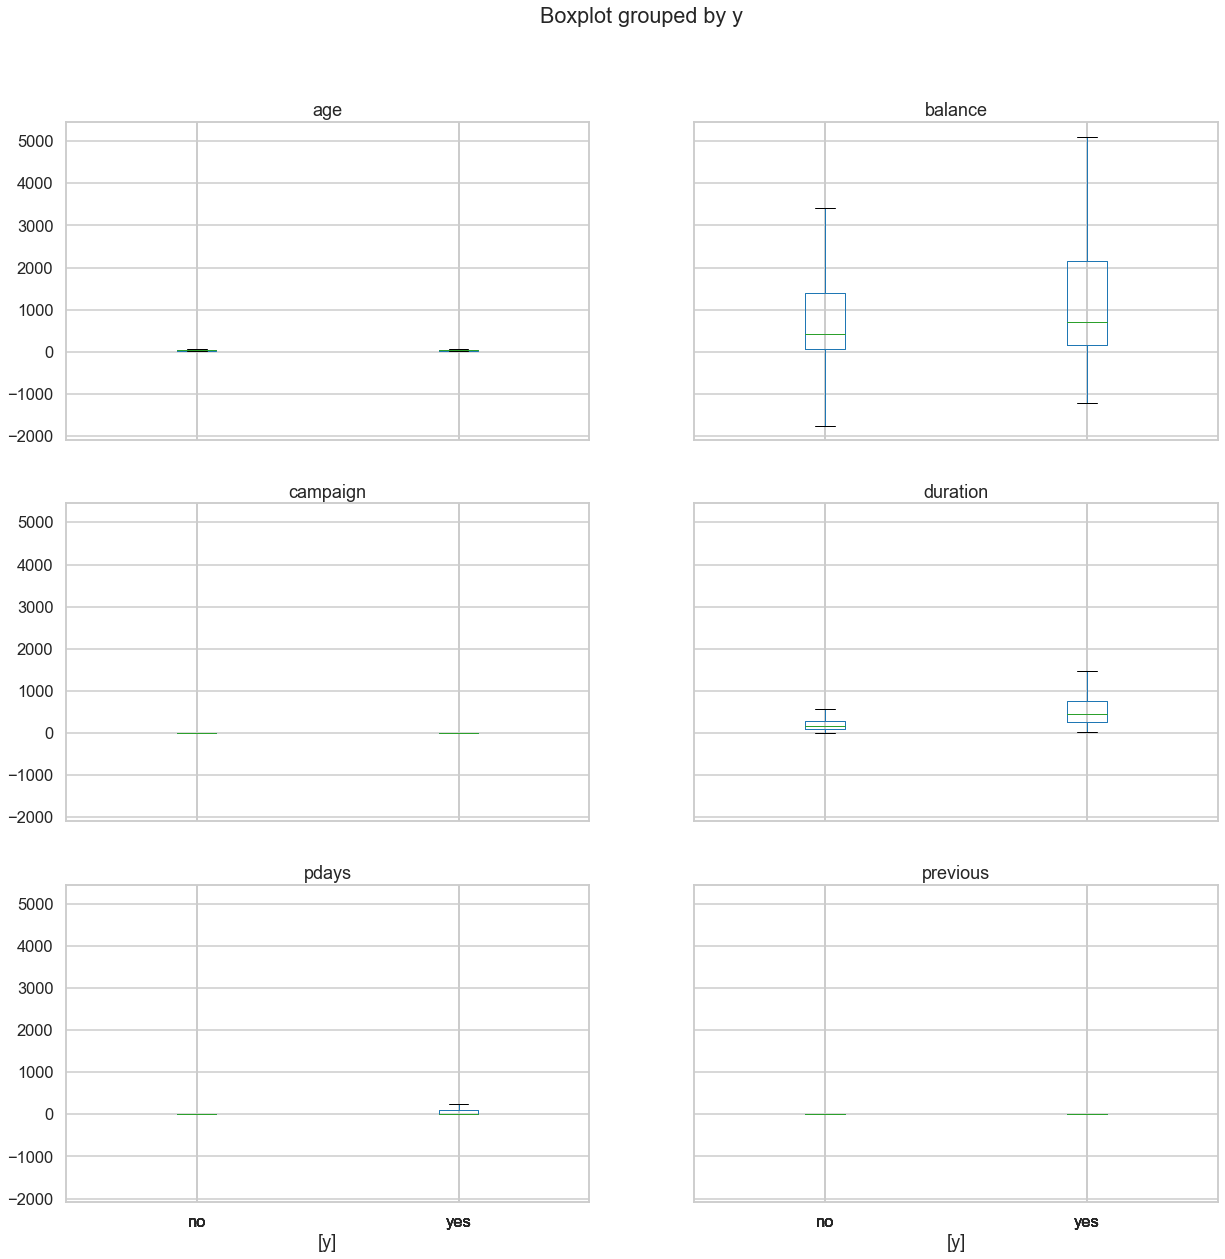

In [7]:
# check outliers
data.boxplot(by="y", showfliers=False, figsize=(20,20)) # y is the target variable
plt.show()

### Identify corrleation between variables

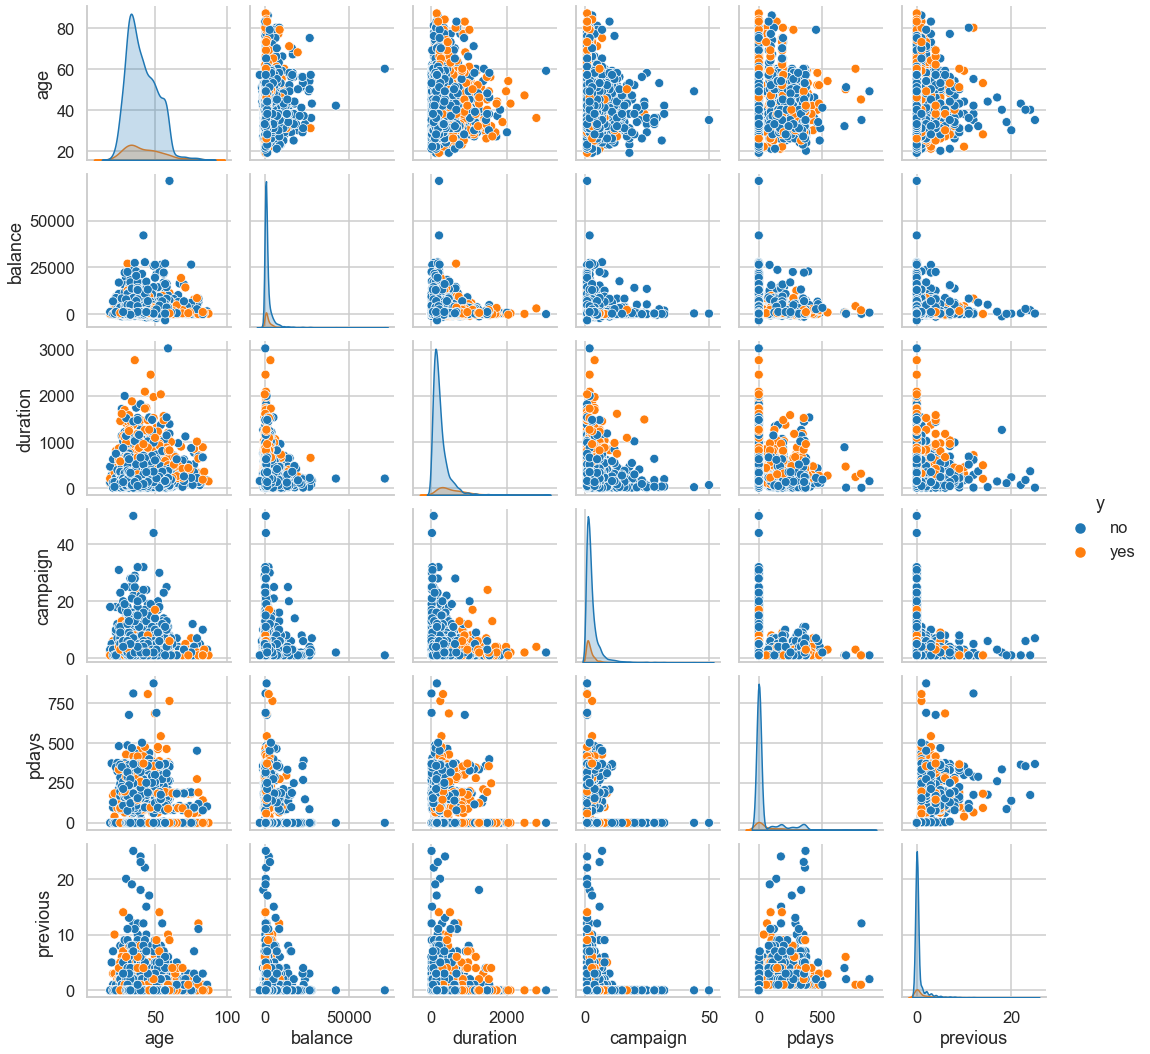

In [8]:
sns.set_context('talk')
sns.pairplot(data, hue='y')
# plt.show()

In [9]:
corr_mat = data.corr()
# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0
# corr

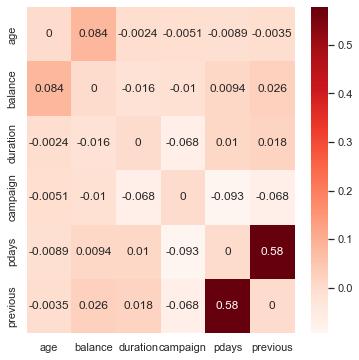

In [10]:
# Lets visualize the data 
# Correlation matrix visualisation
sns.set(style="whitegrid")
sns.set(font_scale=1.0)
sns.heatmap(corr_mat, xticklabels=corr_mat.columns, yticklabels=corr_mat.columns, annot=True, cmap=plt.cm.Reds)
plt.show()

In [11]:
corr_mat.abs().idxmax()

age          balance
balance          age
duration    campaign
campaign       pdays
pdays       previous
previous       pdays
dtype: object

## Feature Engineering

In [12]:
# Lets drop the columns not needed
data = data.drop(['day', 'month'], axis=1)

Lets segregate the data into categorical , numerical variables , binary variables and ordinal variables.

In [13]:
df_uniques = pd.DataFrame([[i, len(data[i].unique())] for i in data.columns], columns=['Variable', 'Unique Values']).set_index('Variable')
df_uniques

,Unique Values
Variable,
age,67
job,12
marital,3
education,4
default,2
balance,2353
housing,2
loan,2
contact,3


In [14]:
# Lets identify binary variables
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
# Lets identify categorical variables
categorical_variables = list(df_uniques[(15 >= df_uniques['Unique Values']) & (df_uniques['Unique Values'] > 2)].index)
# Lets identify ordinal variables
ordinal_variables = []
# Lets find the numerical variables
numerical_variables = list(set(data.columns) - set(binary_variables) - set(categorical_variables) - set(ordinal_variables))
print('Binary variables: {}'.format(binary_variables))
print('Categorical variables: {}'.format(categorical_variables))
print('Numerical variables: {}'.format(numerical_variables))
print('Ordinal variables: {}'.format(ordinal_variables))
# Check if there any common variables between the three categories
print('Common variables between binary, categorical,numerical and ordinal: {}'
.format(set(binary_variables).intersection(set(categorical_variables)
.intersection(set(numerical_variables))).intersection(set(ordinal_variables))))

Binary variables: ['default', 'housing', 'loan', 'y']
Categorical variables: ['job', 'marital', 'education', 'contact', 'poutcome']
Numerical variables: ['duration', 'previous', 'pdays', 'campaign', 'balance', 'age']
Ordinal variables: []
Common variables between binary, categorical,numerical and ordinal: set()


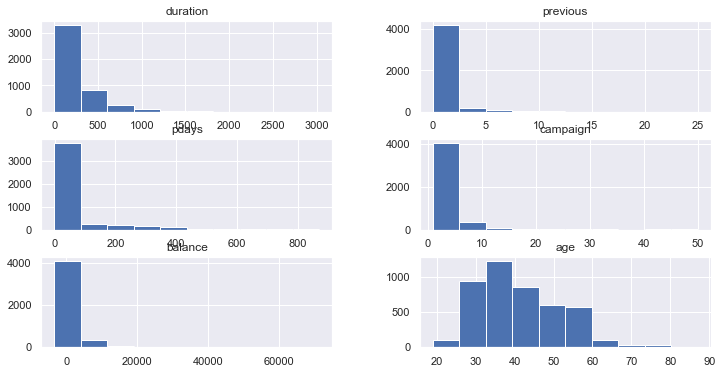

In [15]:
data[numerical_variables].hist(figsize=(12, 6))
plt.show()

### Remove Skew with boxcox1p transformation

In [16]:
log_columns = data.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

log_columns

/Users/mohameddhameemm/anaconda3/envs/kaggle_env/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


balance     6.596431
previous    5.875259
campaign    4.743914
duration    2.772420
pdays       2.717071
dtype: float64

In [17]:
# Box Cox Transformation
for col in log_columns.index:
    data[col] = boxcox1p(data[col], 0.5)

In [18]:
lb, le = LabelBinarizer(), LabelEncoder()
# Encode the ordinal variables
for column in ordinal_variables:
    data[column] = le.fit_transform(data[column])

# Encode the binary variables
for column in binary_variables:
    data[column] = lb.fit_transform(data[column])

categorical_variables = list(set(categorical_variables) - set(ordinal_variables))
data = pd.get_dummies(data, columns = categorical_variables, drop_first=True)

In [19]:
# Lets scale the numerical variables
scaler = MinMaxScaler()
data[numerical_variables] = scaler.fit_transform(data[numerical_variables])

## Un Supervised Model Building

In [20]:
num_clusters = 2
# we will consider there are only 2 clusters
X = data.drop(['y'], axis=1)
y = data['y']
# X.replace([np.inf, -np.inf], np.nan, inplace=True)
X = np.nan_to_num(X)
# Lets split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### K-Means Clustering

In [21]:
# Lets take the optimal number of clusters as 6
km = KMeans(n_clusters=num_clusters, init='k-means++', n_init=10, max_iter=300, random_state=0)
km.fit(X_train)
# predict kmeamns labels
y_pred_kmeans = km.predict(X_test)

### MeanShift Clustering

In [22]:
clustering = MeanShift(min_bin_freq=10,max_iter=1000).fit(X_train)
y_pred_meanshift = clustering.predict(X_test)

## Classification Model for validation

We will validate the clusters with Binary Classification model.

In [23]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)

In [24]:
# Lets fit a simple Decision Tree for the classification
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)
y_test_pred = dt.predict(X_test)

In [25]:
df = pd.DataFrame({'Actual': y_test, 'DecisionTree': y_test_pred, 'Kmeans': y_pred_kmeans, 'Meanshift': y_pred_meanshift})
df.groupby(['Actual', 'DecisionTree', 'Kmeans', 'Meanshift']).size().to_frame().rename(columns={0:'number'})


number
Actual DecisionTree Kmeans Meanshift        
0      0            0      0             777
                    1      0             311
       1            0      0              59
                    1      0              58
1      0            0      0              60
                    1      0              29
       1            0      0              35
                    1      0              28

In [26]:
# here we will compare the perfomance of the Decision Tree with the KMeans and the Hierarchical Clustering
train_test_full_error = pd.concat([measure_error(y_test, y_test_pred, 'Decision Tree'),
                                   measure_error(y_test, y_pred_kmeans, 'Kmeans'),
                                   measure_error(y_test, y_pred_meanshift, 'Meanshift')],
                              axis=1)

/Users/mohameddhameemm/anaconda3/envs/kaggle_env/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


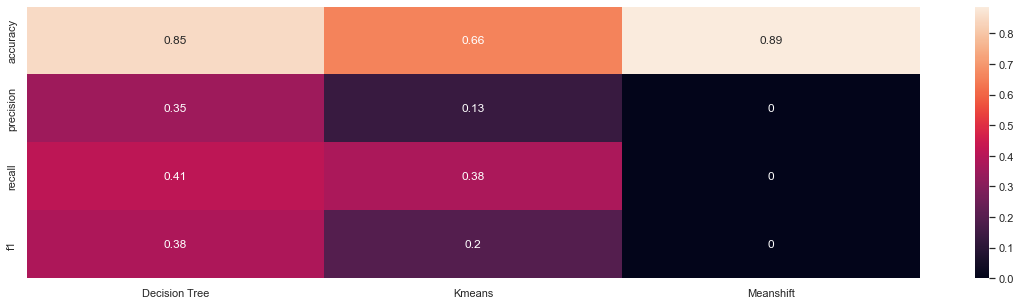

In [27]:
fig = plt.figure(figsize=(20,5))
ax = plt.axes()
sns.heatmap(train_test_full_error, annot=True)
plt.show()

## Key Findings and Recommendations

* With the above analysis for Unsupervised Learning, K-Means Clustering perform better than MeanShift Clustering. 
* Meanshift clustering predicted all the customers into single cluster
* Compared to Supervised "Decision Tree" model, K-Means Clustering model performs atpar with the accuracy.
* We will conclude, K-Means Clustering model is a good model for unsupervised learning.

# Next Steps

* We have used only small dataset for this assignment. To proceed further, we will use large dataset.
* Apart from K-Means clustering model, we can explore other clustering models like DBSCAN, Agglomerative Clustering, etc.
* We can use Decision Tree model for classification and run in parallel to K-Means Clustering model in the long run to get better results.
